# Problem 1

In [14]:
import math
import numpy as np

#given x values, return the h values
def findhvals(xvals):
    #create hvals matrix to return values
    hvals = np.array([])
    #loop through values in xvals
    for i in range(0,len(xvals)-1):
        #append the values to hvals
        hvals = np.append(hvals,xvals[i+1]-xvals[i])
    #return the h values
    return hvals

#given x values, find the tri-diagonal matrix
def findTriDiagonal(xvals):
    #get h values
    hvals = findhvals(xvals)
    #initialize the tri Diagonal matrix
    triDiagonal = np.zeros((len(xvals)-2,len(xvals)-2))
    #loop through rows of tri Diagonal matrix
    for row in range(0,len(xvals)-2):
        #loop through columns of tri Diagonal matrix
        for col in range(0,len(xvals)-2):
            #assign values to diagonal
            if row == col:
                triDiagonal[row, col] = 2*(hvals[row]+hvals[row+1])
            #assign values to subdiagonal
            if row == col+1:
                triDiagonal[row,col] = hvals[row]
            #assign values to super diagonal
            if col == row+1:
                triDiagonal[row,col] = hvals[row+1]
    #return tri Diagonal matrix
    return triDiagonal

#find the coefficient matrix
def findcoeff(xvals,yvals):
    #get h values
    hvals = findhvals(xvals)
    #create the coefficient matrix
    coeff = np.zeros(len(xvals)-2)
    #fill the coefficient matrix with the correct values
    for i in range(0,len(xvals)-2):
        coeff[i] = -6/hvals[i]*(yvals[i+1]-yvals[i]) + 6/hvals[i+1]*(yvals[i+2]-yvals[i+1])
    #return the coefficient matrix
    return coeff

#find the z values
def findzvals(xvals,yvals):
    #initialize zvals to be an array of zeros
    zvals = np.zeros(len(xvals))
    #multiplying the inverse of the tridiagonal matrix by the vector
    zvals[1:len(xvals)-1] = np.matmul(np.linalg.inv(findTriDiagonal(xvals)),findcoeff(xvals,yvals))
    #return the zvals array
    return zvals

#find avalues
def findavals(xvals,yvals):
    #initialize avals to be an array of zeros
    avals = np.zeros(len(xvals)-1)
    #find the z values
    zvals = findzvals(xvals,yvals)
    #find the h values
    hvals = findhvals(xvals)
    
    #loop through the xvals
    for i in range(0,len(xvals)-1):
        #compute a_i
        avals[i] = 1/(6*hvals[i])*(zvals[i+1]-zvals[i])

    #return the array avals
    return avals

#find bvalues
def findbvals(xvals,yvals):
    #initialize bvals to be an array of zeros
    bvals = np.zeros(len(xvals)-1)
    #find the z values
    zvals = findzvals(xvals,yvals)
    
    #loop through the xvals
    for i in range(0,len(xvals)-1):
        #compute b_i
        bvals[i] = zvals[i]/2

    #return the array bvals
    return bvals

#find cvalues
def findcvals(xvals,yvals):
    #initialize cvals to be an array of zeros
    cvals = np.zeros(len(xvals)-1)
    #find the z values
    zvals = findzvals(xvals,yvals)
    #find the h values
    hvals = findhvals(xvals)
    
    #loop through the xvals
    for i in range(0,len(xvals)-1):
        #compute c_i
        cvals[i] = (1/hvals[i])*(yvals[i+1]-yvals[i]) - (hvals[i]/6)*(zvals[i+1]+2*zvals[i])

    #return the array cvals
    return cvals

#find dvalues
def finddvals(xvals,yvals):
    #initialize dvals to be an array of zeros
    dvals = np.zeros(len(xvals)-1)
    #loop through the xvals
    for i in range(0,len(xvals)-1):
        #compute d_i
        dvals[i] = yvals[i]
    #return the array dvals
    return dvals

In [15]:
#Testing the findhvals function
print('Testing findhvals')
#the result should be [1,1,2]
print(findhvals([0,1,2,4]))

#Testing the findTriDiagonal function
print('Testing findTriDiagonal')
#the result should be [[4,1],[1 6]]
print(findTriDiagonal([0,1,2,4]))

#Testing the findcoeff function
print('Testing findcoeff')
#the result should be [-6 3]
print(findcoeff([0,1,2,4],[0,2,3,6]))

#Testing the findzvals function
print('Testing findzvals')
#the result should be [0,-1.6956,0.7826,0]
print(findzvals([0,1,2,4],[0,2,3,6]))

#Testing the findavals function
print('Testing findavals')
#the result should be [-0.2826,0.4130,-0.06521]
print(findavals([0,1,2,4],[0,2,3,6]))

#Testing the findbvals function
print('Testing findbvals')
#the result should be [0,-0.8478,0.3913]
print(findbvals([0,1,2,4],[0,2,3,6]))

#Testing the findcvals function
print('Testing findcvals')
#the result should be [2.2826,1.4347,0.9782]
print(findcvals([0,1,2,4],[0,2,3,6]))

#Testing the finddvals function
print('Testing finddvals')
#the result should be [0,2,3]
print(finddvals([0,1,2,4],[0,2,3,6]))

Testing findhvals
[1. 1. 2.]
Testing findTriDiagonal
[[4. 1.]
 [1. 6.]]
Testing findcoeff
[-6.  3.]
Testing findzvals
[ 0.         -1.69565217  0.7826087   0.        ]
Testing findavals
[-0.2826087   0.41304348 -0.06521739]
Testing findbvals
[ 0.         -0.84782609  0.39130435]
Testing findcvals
[2.2826087  1.43478261 0.97826087]
Testing finddvals
[0. 2. 3.]


# Problem 2

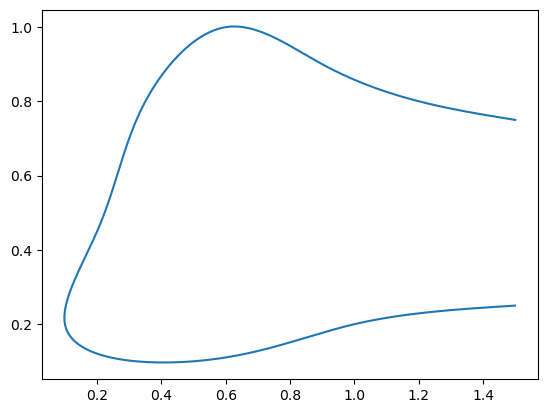

In [17]:
import matplotlib.pyplot as plt
#define the tvals vector
tvals = np.array([0,0.618,0.935,1.255,1.636,1.905,2.317,2.827,3.330])

#define the xvals vector
xvals = np.array([1.50,0.90,0.60,0.35,0.20,0.10,0.50,1.00,1.50])

#define the yvals vector
yvals = [0.75,0.90,1.00,0.80,0.45,0.20,0.10,0.20,0.25]

#find the coefficients for the spline interpolation with tvals and xvals
a1 = findavals(tvals,xvals)
b1 = findbvals(tvals,xvals)
c1 = findcvals(tvals,xvals)
d1 = finddvals(tvals,xvals)

#find the coefficients for the spline interpolation with tvals and yvals
a2 = findavals(tvals,yvals)
b2 = findbvals(tvals,yvals)
c2 = findcvals(tvals,yvals)
d2 = finddvals(tvals,yvals)

#find the x,y coordinates for plotting
#first, create t vector
tcoords = np.arange(0,3.330,0.001)

#next create the x coordinates vector
xcoords = np.array([])
#also create the y coordinates vector
ycoords = np.array([])

#iterate through all the t values
for num in tcoords:
    #iterate through all the intervals
    for i in range(0,len(tvals)-1):
        #if t is in between t_i and t_i+1
        if num >= tvals[i] and num <= tvals[i+1]:
            #find the x and y interpolations
            xcoords = np.append(xcoords, a1[i]*(num-tvals[i])**3+b1[i]*(num-tvals[i])**2+c1[i]*(num-tvals[i])+d1[i])
            ycoords = np.append(ycoords, a2[i]*(num-tvals[i])**3+b2[i]*(num-tvals[i])**2+c2[i]*(num-tvals[i])+d2[i])

#plot the graph
plt.plot(xcoords,ycoords)
plt.show()

finding the $a$ values for the $x$ interpolation:

In [19]:
print('a values for x interpolation')
print(a1)

a values for x interpolation
[ 0.01053694  0.10210253  0.98716733 -1.77354871  5.39456796 -3.39333331
  0.670643   -0.14744175]


finding the $b$ values for the $x$ interpolation:

In [21]:
print('b values for x interpolation')
print(b1)

b values for x interpolation
[ 0.          0.01953548  0.11663499  1.06431562 -0.96285056  3.39056579
 -0.80359419  0.2224896 ]


finding the $c$ values for the $x$ interpolation:

In [23]:
print('c values for x interpolation')
print(c1)

c values for x interpolation
[-0.9748981  -0.96282517 -0.91965913 -0.54175494 -0.50309674  0.14995865
  1.21579095  0.91942761]


finding the $d$ values for the $x$ interpolation:

In [25]:
print('d values for x interpolation')
print(d1)

d values for x interpolation
[1.5  0.9  0.6  0.35 0.2  0.1  0.5  1.  ]


finding the $a$ values for the $y$ interpolation:

In [27]:
print('a values for y interpolation')
print(a2)

a values for y interpolation
[ 0.2769437  -3.00101226  2.43045042 -0.2731872   2.17389553 -0.78439737
 -0.47422633  0.17248333]


finding the $b$ values for the $y$ interpolation:

In [29]:
print('b values for y interpolation')
print(b2)

b values for y interpolation
[ 0.          0.51345362 -2.34050904 -0.00727664 -0.3195296   1.43480409
  0.46528894 -0.26027735]


finding the $c$ values for the $y$ interpolation:

In [31]:
print('c values for y interpolation')
print(c2)

c values for y interpolation
[ 0.136947    0.45426134 -0.12491523 -0.87620665 -1.00071982 -0.70071098
  0.08212734  0.18668325]


finding the $d$ values for the $y$ interpolation:

In [33]:
print('d values for y interpolation')
print(d2)

d values for y interpolation
[0.75 0.9  1.   0.8  0.45 0.2  0.1  0.2 ]
